<a href="https://colab.research.google.com/github/mehr64/Predicting-Crime-Trends/blob/main/MyProject_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
DF_train=pd.read_csv('/content/sample_data/train_dataset.csv')
DF_test=pd.read_csv('/content/sample_data/test_dataset.csv')

In [ ]:
DF_train_final = DF_train.loc[:,['Financial Year', 'Financial Quarter','Force Name','Offence Description','Number of Offences']]
DF_test_final = DF_test.loc[:,['Financial Year', 'Financial Quarter','Force Name','Offence Description','Number of Offences']]
#DF_train_final
x_train = DF_train_final.loc[:,['Financial Year', 'Financial Quarter','Force Name','Offence Description']]
#x_train

y_train = DF_train_final.loc[:,['Number of Offences']]
#y_train
x_test = DF_test_final.loc[:,['Financial Year', 'Financial Quarter','Force Name','Offence Description']]
#x_train

y_test = DF_test_final.loc[:,['Number of Offences']]
#y_test

In [ ]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.svm import SVR

model_linear= SVR(kernel ='linear')
model_linear.fit (x_train,y_train)

model_RBF= SVR(kernel ='rbf')
model_RBF.fit (x_train,y_train)

model_poly= SVR(kernel ='poly')
model_poly.fit (x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor()
model_DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RF_50 = RandomForestRegressor(n_estimators = 50)
model_RF_50.fit(x_train, y_train)
model_RF_100 = RandomForestRegressor(n_estimators = 100)
model_RF_100.fit(x_train, y_train)
model_RF_200 = RandomForestRegressor(n_estimators = 200)
model_RF_200.fit(x_train, y_train)

<ipython-input-14-75464f9c01ba>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF_50.fit(x_train, y_train)
<ipython-input-14-75464f9c01ba>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF_100.fit(x_train, y_train)
<ipython-input-14-75464f9c01ba>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF_200.fit(x_train, y_train)


RandomForestRegressor(n_estimators=200)

In [ ]:
# prediction Linear Regression
y_pred_LR = model_LR.predict(x_test)

# Prediction different type of SVR
y_pred_linear_SVR = model_linear.predict(x_test)
y_pred_RBF_SVR = model_RBF.predict(x_test)
y_pred_poly_SVR = model_poly.predict(x_test)

# Prediction Decision Tree
y_pred_DT = model_DT.predict(x_test)

# prediction different type of Random Forest
y_pred_RF_50 = model_RF_50.predict(x_test)
y_pred_RF_100 = model_RF_100.predict(x_test)
y_pred_RF_200 = model_RF_200.predict(x_test)



In [ ]:
from sklearn import metrics
import numpy as np
mse_LR = metrics.mean_squared_error(y_test,y_pred_LR)
mse_linear = metrics.mean_squared_error(y_test,y_pred_linear_SVR)
mse_rbf = metrics.mean_squared_error(y_test,y_pred_RBF_SVR)
mse_poly = metrics.mean_squared_error(y_test,y_pred_poly_SVR)

mse_DT = metrics.mean_squared_error(y_test,y_pred_DT)
mse_RF_50 = metrics.mean_squared_error(y_test,y_pred_RF_50)
mse_RF_100 = metrics.mean_squared_error(y_test,y_pred_RF_100)
mse_RF_200 = metrics.mean_squared_error(y_test,y_pred_RF_200)

In [ ]:
print("MSE (Linear Regression):", mse_LR)
print("MSE (Linear SVR):", mse_linear)
print("MSE (RBF SVR):", mse_rbf)
print("MSE (Polynomial SVR):", mse_poly)
print("MSE (Decision Tree):", mse_DT)
print("MSE (Random Forest 50):", mse_RF_50)
print("MSE (Random Forest 100):", mse_RF_100)
print("MSE (Random Forest 200):", mse_RF_200)

MSE (Linear Regression): 842079.6658624114
MSE (Linear SVR): 890789.3457830012
MSE (RBF SVR): 891626.8903137272
MSE (Polynomial SVR): 891232.4989417826
MSE (Decision Tree): 17901.481437632134
MSE (Random Forest 50): 22453.98480979281
MSE (Random Forest 100): 22717.905820232558
MSE (Random Forest 200): 22233.21124634672


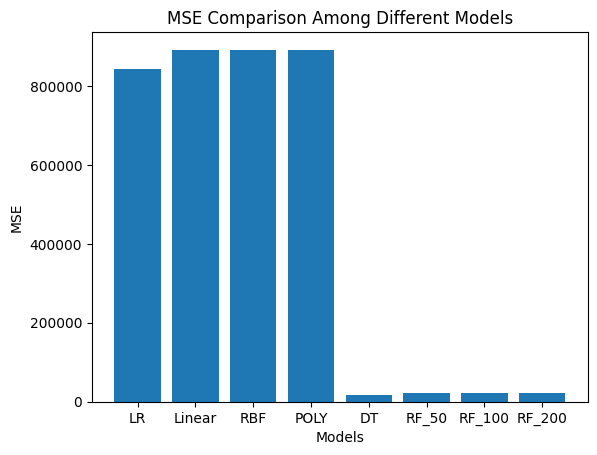

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# vector x
x = np.array(["LR", "Linear", "RBF", "POLY", "DT", "RF_50", "RF_100", "RF_200"])

# vector y
y = np.array([mse_LR, mse_linear, mse_rbf, mse_poly, mse_DT, mse_RF_50, mse_RF_100, mse_RF_200])

# اplt.bar(x, y)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison Among Different Models')

plt.bar(x,y)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RF_50 = RandomForestRegressor(n_estimators = 50)
model_RF_50.fit(x_train, y_train.values.ravel())
model_RF_100 = RandomForestRegressor(n_estimators = 100)
model_RF_100.fit(x_train, y_train.values.ravel())
model_RF_200 = RandomForestRegressor(n_estimators = 200)
model_RF_200.fit(x_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=200)

In [ ]:
from sklearn.svm import SVR

model_linear= SVR(kernel ='linear')
model_linear.fit (x_train,y_train.values.ravel())

model_RBF= SVR(kernel ='rbf')
model_RBF.fit (x_train,y_train.values.ravel())

model_poly= SVR(kernel ='poly')
model_poly.fit (x_train,y_train.values.ravel())

SVR(kernel='poly')

In [ ]:
# prediction Linear Regression
y_pred_LR = model_LR.predict(x_test)

# Prediction different type of SVR
y_pred_linear_SVR = model_linear.predict(x_test)
y_pred_RBF_SVR = model_RBF.predict(x_test)
y_pred_poly_SVR = model_poly.predict(x_test)

# Prediction different type of DT
y_pred_DT = model_DT.predict(x_test)

# prediction different type of Random Forest
y_pred_RF_50 = model_RF_50.predict(x_test)
y_pred_RF_100 = model_RF_100.predict(x_test)
y_pred_RF_200 = model_RF_200.predict(x_test)

In [ ]:
from sklearn import metrics
import numpy as np
mse_LR = metrics.mean_squared_error(y_test,y_pred_LR)
mse_linear = metrics.mean_squared_error(y_test,y_pred_linear_SVR)
mse_rbf = metrics.mean_squared_error(y_test,y_pred_RBF_SVR)
mse_poly = metrics.mean_squared_error(y_test,y_pred_poly_SVR)

mse_DT = metrics.mean_squared_error(y_test,y_pred_DT)
mse_RF_50 = metrics.mean_squared_error(y_test,y_pred_RF_50)
mse_RF_100 = metrics.mean_squared_error(y_test,y_pred_RF_100)
mse_RF_200 = metrics.mean_squared_error(y_test,y_pred_RF_200)

In [ ]:
print("MSE (Linear Regression):", mse_LR)
print("MSE (Linear SVR):", mse_linear)
print("MSE (RBF SVR):", mse_rbf)
print("MSE (Polynomial SVR):", mse_poly)
print("MSE (Decision Tree):", mse_DT)
print("MSE (Random Forest 50):", mse_RF_50)
print("MSE (Random Forest 100):", mse_RF_100)
print("MSE (Random Forest 200):", mse_RF_200)

MSE (Linear Regression): 842079.6658624114
MSE (Linear SVR): 890789.3457830012
MSE (RBF SVR): 891626.8903137272
MSE (Polynomial SVR): 891232.4989417826
MSE (Decision Tree): 17901.481437632134
MSE (Random Forest 50): 23045.840141547567
MSE (Random Forest 100): 23119.563504190275
MSE (Random Forest 200): 21797.212839216703


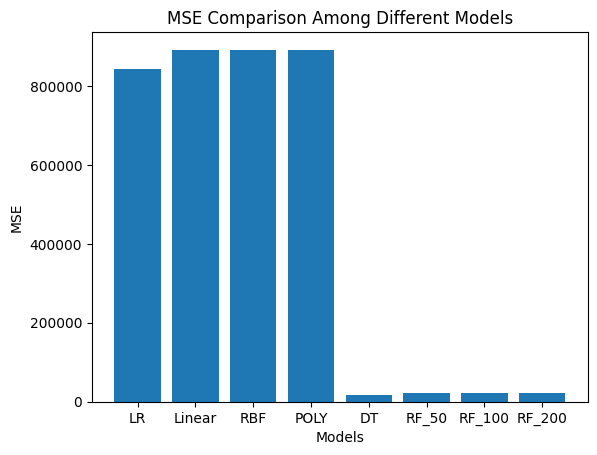

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# vector x
x = np.array(["LR", "Linear", "RBF", "POLY", "DT", "RF_50", "RF_100", "RF_200"])

# vector y
y = np.array([mse_LR, mse_linear, mse_rbf, mse_poly, mse_DT, mse_RF_50, mse_RF_100, mse_RF_200])

# اplt.bar(x, y)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison Among Different Models')

plt.bar(x,y)
plt.show()